In [3]:
%pylab inline

plt.rcParams['figure.figsize'] = (1 * 10.0, 1 * 8.0)
plt.rcParams['font.size'] = 35

from scipy import io
from copt import stochastic
from copt.utils import Trace

Populating the interactive namespace from numpy and matplotlib


In [23]:
data = io.loadmat('sido0_train.mat')['X'].toarray()
targets = np.loadtxt('sido0_train.targets')
n_samples, n_features = data.shape

# split data in two equal
X_train, X_test = data[:n_samples // 2], data[n_samples // 2:]
y_train, y_test = targets[:n_samples // 2], targets[n_samples // 2:]

# compute amount of regularization
R = np.sqrt(np.max( np.sum(X_train * X_train, 1)))
L1_reg = R / np.sqrt(n_samples // 2)
print('L1 regularization: %s' % L1_reg)


L1 regularization: 0.397579043804


In [36]:
x0 = np.zeros(n_features)

def obj_test(x):
    loss = 0.5 * np.linalg.norm(y_test - X_test.dot(x)) ** 2 / X_test.shape[0]# + L1_reg * np.sum(np.abs(x))
    return loss

trace_test = Trace(obj_test)

# this computes the step size as 1 / 3L
step_size = stochastic.compute_step_size('squared', X_train, 0., step_size_factor=3)
opt_out = stochastic.fmin_SAGA(
    stochastic.f_squared, stochastic.deriv_squared, X_train, y_train, x0, alpha=1e-3, step_size=step_size,
    beta=L1_reg, trace=True, max_iter=500, tol=0, g_prox=stochastic.prox_L1, g_func=stochastic.f_L1, callback=trace_test)

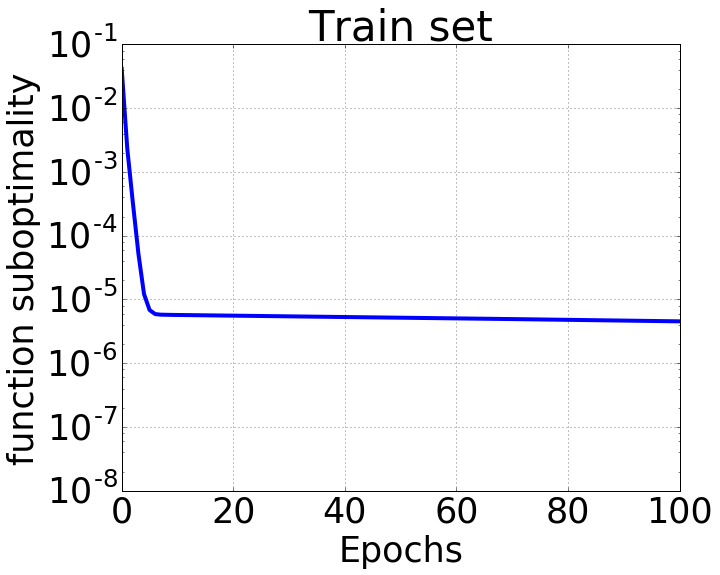

In [35]:
plt.title('Train set')
plt.plot(opt_out.trace_func - np.min(opt_out.trace_func), lw=4)
plt.grid()
plt.ylabel('function suboptimality')
plt.xlim(0, 100)
plt.xlabel('Epochs')
plt.yscale('log')

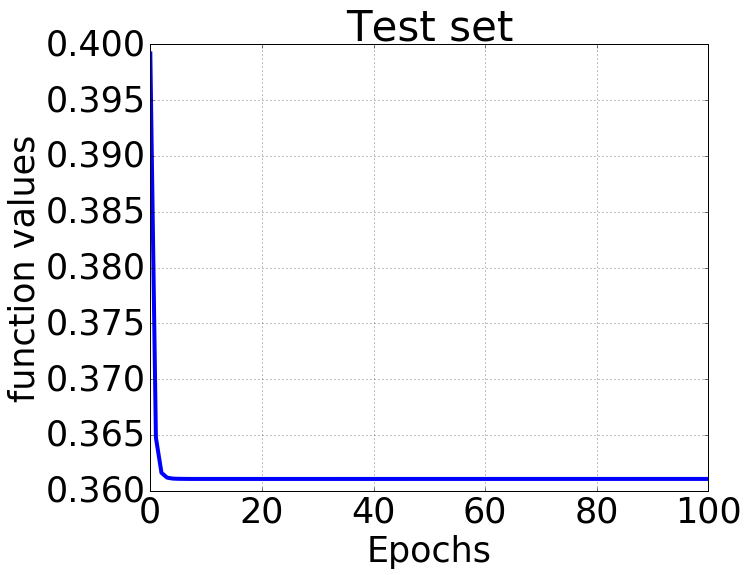

In [39]:
plt.title('Test set')
plt.plot(np.array(trace_test.values), lw=4)
plt.grid()
plt.ylabel('function values')
plt.xlim(0, 100)
plt.xlabel('Epochs')
plt.show()